<a href="https://colab.research.google.com/github/nidhivanjare/Twitter_SA/blob/main/twitter_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flair 
import pandas as pd 
import flair

     |████████████████████████████████| 286kB 5.1MB/s 
     |████████████████████████████████| 798kB 9.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.5MB 19.6MB/s 
     |████████████████████████████████| 19.7MB 8.2MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 776.8MB 13kB/s 
     |████████████████████████████████| 983kB 25.0MB/s 
     |████████████████████████████████| 1.2MB 30.5MB/s 
     |████████████████████████████████| 901kB 31.8MB/s 
     |████████████████████████████████| 3.3MB 15.7MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9705 sha256=ba91fee6dbdeca6df9579ee77facdfcde7244ddccfd6adb03d59ee4ced3ba6d5
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for mpld3: filename=m

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Dwyane Jonson 

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/DwayneJonson.csv')
df

,Title,Title_URL,css4rbku5_URL,Date,css901oao1,css4rbku52,Tweet,Replies,Likes
0,Jon Ott,https://twitter.com/OriginalJLP,https://twitter.com/OriginalJLP/status/1310328...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,"Welcome to the crew, glad to have you with us.",3.0,30.0
1,Sacchidanand Shinde,https://twitter.com/sacchidanand_bs,https://twitter.com/sacchidanand_bs/status/131...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Love you rock,11.0,11.0
2,Jose,https://twitter.com/TripplegcG,https://twitter.com/TripplegcG/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,All the magatards mad,25.0,129.0
3,LegRah,https://twitter.com/afpanaccio,https://twitter.com/afpanaccio/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,NaN,1.0,69.0
4,Dane Zukes,https://twitter.com/ZRockwellD,https://twitter.com/ZRockwellD/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Does the J stand for Jabroni in Donald J Trump,14.0,14.0
...,...,...,...,...,...,...,...,...,...
193,Mr.Quagmire,https://twitter.com/Mr_Quagmire_USA,https://twitter.com/Mr_Quagmire_USA/status/131...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,NaN,NaN,NaN
194,platypus puppet,https://twitter.com/platypuspuppet,https://twitter.com/platypuspuppet/status/1310...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,You are the best!,NaN,NaN
195,Nikki Fourtzialas,https://twitter.com/nFourtzi,https://twitter.com/nFourtzi/status/1310949844...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,Ugh sorry to see you have fallen for their BS....,3.0,3.0
196,Jeannie919,https://twitter.com/jeanmc919,https://twitter.com/jeanmc919/status/131095294...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,NaN,NaN,NaN


In [4]:
# sentiment_model = flair.models.TextClassifier.load('en-sentiment')
sentiment_model = flair.models.TextClassifier.load('sentiment-fast')

2021-07-16 09:45:26,737 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-fasttext-rnn/sentiment-en-mix-ft-rnn.pt not found in cache, downloading to /tmp/tmpg4f0geyd


100%|██████████| 1242007042/1242007042 [01:11<00:00, 17413179.07B/s]

2021-07-16 09:46:38,441 copying /tmp/tmpg4f0geyd to cache at /root/.flair/models/sentiment-en-mix-ft-rnn.pt


2021-07-16 09:46:44,248 removing temp file /tmp/tmpg4f0geyd
2021-07-16 09:46:44,444 loading file /root/.flair/models/sentiment-en-mix-ft-rnn.pt


In [67]:

nan_value = float("NaN")
# Convert NaN values to empty string
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Tweet"], inplace=True)

In [131]:
df1 = df.dropna(subset=['Tweet'])
df1
df_base = df1

index = df_base.index
number_of_rows = len(index)
print(number_of_rows)

114


## 1) Flair


In [134]:

sentiment =[]
confidence = []

for tweet in df1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)

In [135]:
print(sentiment)
print(confidence)

['POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NE

In [136]:
df1['Sent'] = sentiment
df1['Score'] = confidence

In [175]:
Positive = 0
Negative = 0

for c in df1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1
 

print(Positive , Negative)

total_likes = 372700

Retweet = 75800


Influence_DJ = ((114 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_DJ)


66 48
4505.52


In [176]:
df2 = df_base


## 2) NLTK

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.8176}


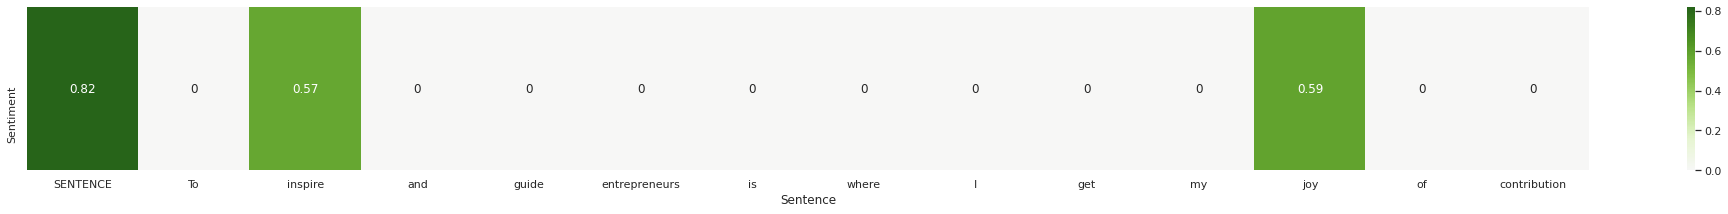

In [177]:

# import libraries
import pandas as pd
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import model
nltk.download('vader_lexicon')

# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

# function to visualize 
def visualize_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# text
sentence = "To inspire and guide entrepreneurs is where I get my joy of contribution"

# sentiment analysis
sid = SentimentIntensityAnalyzer()

# call method 
print(sid.polarity_scores(sentence))

# heatmap 
visualize_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.7184}
{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.4939}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}
{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.205, 'neu': 0.4, 'pos': 0.395, 'compound': 0.2263}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
{'neg': 0.235, 'neu': 0.698, 'pos': 0.067, 'compound': -0.7003}
{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}
{'neg': 0.069, 'neu': 0.554, 'pos': 0.377, 'compound': 0.8979}
{'neg': 0.118, 'neu': 0.7, 'pos': 0.182, 'compound': 0.5411}
{'neg': 0.133, 'neu': 0.696, 'pos': 0.171, 'compound': 0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

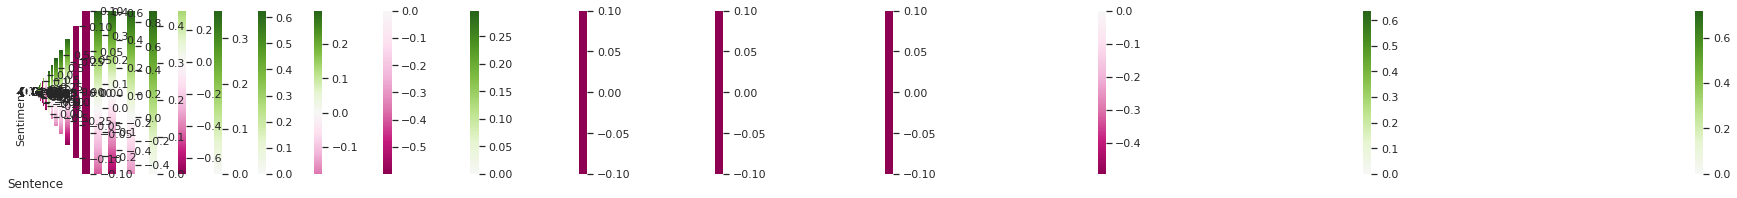

In [178]:
df3 = df_base
negative = 0
positive = 0
neutral = 0



for tweet in df3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1



Influence_DJ = ((114 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_DJ)

## 3) TEXTBLOB

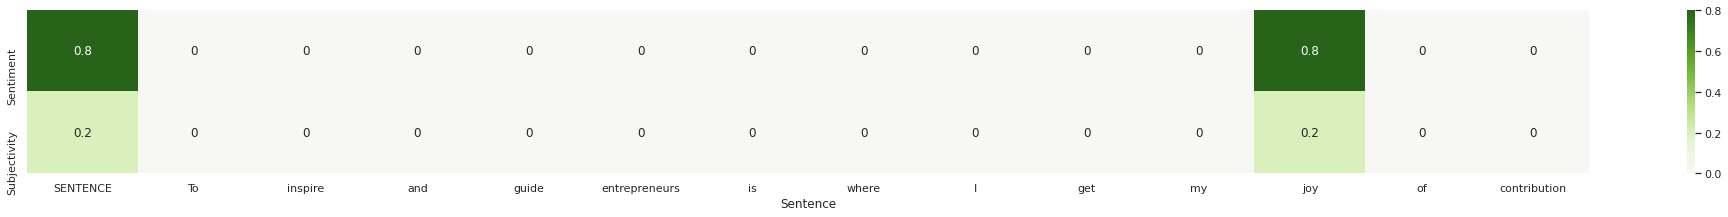

In [179]:


# import libraries
import pandas as pd
import seaborn as sns
from textblob import TextBlob

# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

# function to visualize
def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# text
sentence = "To inspire and guide entrepreneurs is where I get my joy of contribution"

# model
TextBlob(sentence).sentiment

# visualization
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

##Polarity > 0 -> Positive 
##Polarity < 0 -> Negative
##Polarity = 0 -> Neutral

Sentiment(polarity=0.65, subjectivity=0.95)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.20833333333333331, subjectivity=0.43333333333333335)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.08750000000000001, subjectivity=0.39999999999999997)
Sentiment(polarity=0.08333333333333334, subjectivity=0.5833333333333333)
Sentiment(polarity=0.5, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.41666666666666663, subjectivity=0.6944444444444444)
Sentiment(polarity=0.35, subjectivity=0.30000000000000004)
Sentiment(polarity=0.05000000000000001, subjectivity=0.85)
Sentiment(polarity=-0.0697916666666667, subjectivity=0.740625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.19999999999999998, subjectivity=0.4

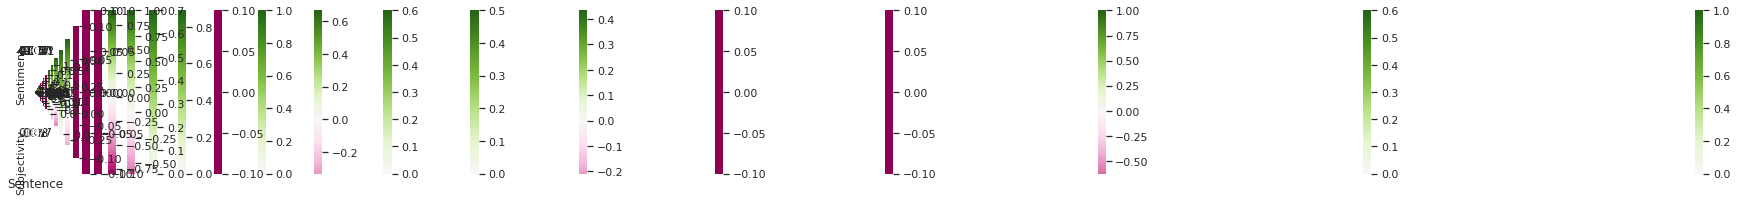

In [180]:
df4 = df_base
negative1 = 0
positive1 = 0
neutral1 = 0

for tweet in df4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1



Influence_DJ = ((114 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_DJ)


## 4) XgBoost - Algorithmia


In [181]:
!pip install algorithmia
import Algorithmia

input = "I am glad that I bought this. It works great!"
client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
algo.set_options(timeout=20) # optional

In [182]:
df5 = df_base
neg = 0
pos = 0


for tweet in df5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

Influence_DJ = ((114 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_DJ)



    

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

#Taylor Swift

In [183]:
TS = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/TaylorSwift.csv')
TS

,Title,Date,Text,Tweets,Replies,Likes,Retweets
0,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,Us too!! \n@JoeBiden,16.0,240.0,6.0
1,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,NaN,NaN,NaN,NaN
2,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,QUEEN,2.0,496.0,9.0
3,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,NaN,5.0,46.0,2.0
4,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,So proud to be a Swiftie! I voted on Friday as...,12.0,109.0,1.0
...,...,...,...,...,...,...,...
187,NaN,NaN,NaN,"I wonder if she willing give up all he money ,...",1.0,1.0,NaN
188,NaN,NaN,NaN,You're crazy.,2.0,3.0,1.0
189,NaN,NaN,NaN,Just keep singing. Stay out of politics.,2.0,4.0,NaN
190,NaN,NaN,NaN,@JoeBiden\n would love to have a party with yo...,5.0,9.0,1.0


In [184]:
ts1 = TS.dropna(subset=['Tweets'])
nan_value = float("NaN")
# Convert NaN values to empty string
ts1.replace("", nan_value, inplace=True)
ts1.dropna(subset = ["Tweets"], inplace=True)
Ts_base = ts1
Ts_base

index = Ts_base.index
number_of_rows = len(index)
print(number_of_rows)


169


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [185]:
sentiment =[]
confidence = []

for tweet in ts1['Tweets']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)



ts1['Sent'] = sentiment
ts1['Score'] = confidence
ts1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Title,Date,Text,Tweets,Replies,Likes,Retweets,Sent,Score
0,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,Us too!! \n@JoeBiden,16.0,240.0,6.0,NEGATIVE,0.894535
2,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,QUEEN,2.0,496.0,9.0,POSITIVE,0.814201
4,caitlin,"Oct 8, 2020",Replying to \n@taylorswift13\n \n@vmagazine\n ...,So proud to be a Swiftie! I voted on Friday as...,12.0,109.0,1.0,POSITIVE,0.982548
6,NaN,NaN,NaN,QUEEN,2.0,496.0,9.0,POSITIVE,0.814201
8,NaN,NaN,NaN,So proud to be a Swiftie! I voted on Friday as...,12.0,109.0,1.0,POSITIVE,0.982548
...,...,...,...,...,...,...,...,...,...
187,NaN,NaN,NaN,"I wonder if she willing give up all he money ,...",1.0,1.0,NaN,POSITIVE,0.563418
188,NaN,NaN,NaN,You're crazy.,2.0,3.0,1.0,POSITIVE,0.500512
189,NaN,NaN,NaN,Just keep singing. Stay out of politics.,2.0,4.0,NaN,POSITIVE,0.543358
190,NaN,NaN,NaN,@JoeBiden\n would love to have a party with yo...,5.0,9.0,1.0,POSITIVE,0.664495


## 1) Flair

In [186]:
Positive = 0
Negative = 0

for c in ts1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 59700

total_likes = 396300

print(Positive , Negative)


Influence_TS = ((169 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_TS)

122 47
4686.75


## 2) NKTL


In [ ]:
ts3 = Ts_base
negative = 0
positive = 0
neutral = 0

for tweet in ts3['Tweets']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1


Influence_TS = ((169 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_TS)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7882}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7882}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6531}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.6597}
{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}
{'neg': 0.176, 'neu': 0.751, 'pos': 0.073, 'compound': -0.6369}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.7324}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.7717}
{'neg': 0.176, 'neu': 0.751, 'pos': 0.073, 'compound': -0.6369}
{'neg': 0.182, 'neu': 0.341, 'pos': 0.477, 'compound'

## 3) Text Blob 

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8662109375, subjectivity=0.875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8662109375, subjectivity=0.875)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.0708333333333333, subjectivity=0.44166666666666665)
Sentiment(polarity=0.4, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.0708333333333333, subjectivity=0.44166666666666665)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.35, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0125, subjectivity=0.3

ValueError: ignored

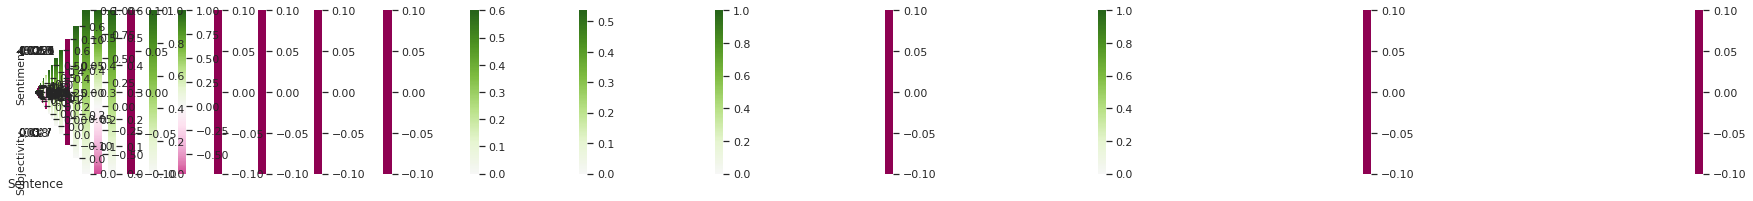

In [80]:
ts4 = Ts_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in ts4['Tweets']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1



Influence_TS = ((169 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_TS)


## 4) XgBoost - Algorithmia


In [81]:
ts5 = Ts_base
neg = 0
pos = 0



for tweet in ts5['Tweets']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

Influence_TS = ((169 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_TS)
    

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

# Mark Cuban 

In [151]:
MC = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/MarkCuban.csv')
MC

,Text,Date,Tweet,Replies,Likes,Retweets
0,Mark Cuban,"Nov 2, 2020",You know damn well covid hospitalizations are ...,225.0,6600.0,455.0
1,Dom Rapp,"Nov 2, 2020",It won't end with a Biden win. The man won't l...,2.0,2.0,NaN
2,Nolan6,"Nov 2, 2020",I love u mark,NaN,1.0,NaN
3,Blake,"Nov 2, 2020",Didn't you encourage and then join in mass gat...,NaN,2.0,NaN
4,Jerry Gahard,"Nov 2, 2020",That y-axis is egregious,NaN,8.0,NaN
...,...,...,...,...,...,...
134,Ed Merritt,"Nov 2, 2020",Trump 2020! Open up! Open your eyes it's poli...,NaN,NaN,NaN
135,Walter,"Nov 2, 2020",The Democratic Party is lost to the radical le...,NaN,NaN,NaN
136,Vanna Zimmerman,"Nov 2, 2020",TrumpPence2020,NaN,NaN,NaN
137,Humanitarian Human,"Nov 2, 2020","V O T E 4 T R U M P:\n\n@mcuban\n, your vo...",NaN,2.0,NaN


In [152]:
mc1 = MC.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
mc1.replace("", nan_value, inplace=True)
mc1.dropna(subset = ["Tweet"], inplace=True)
Mc_base = mc1
Mc_base


index = Mc_base.index
number_of_rows = len(index)
print(number_of_rows)

125


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## 1) FLAIR

In [84]:
sentiment =[]
confidence = []

for tweet in mc1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


mc1['Sent'] = sentiment
mc1['Score'] = confidence
mc1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Text,Date,Tweet,Replies,Likes,Retweets,Sent,Score
0,Mark Cuban,"Nov 2, 2020",You know damn well covid hospitalizations are ...,225.0,6600.0,455.0,NEGATIVE,0.985232
1,Dom Rapp,"Nov 2, 2020",It won't end with a Biden win. The man won't l...,2.0,2.0,NaN,NEGATIVE,0.922834
2,Nolan6,"Nov 2, 2020",I love u mark,NaN,1.0,NaN,POSITIVE,0.992436
3,Blake,"Nov 2, 2020",Didn't you encourage and then join in mass gat...,NaN,2.0,NaN,NEGATIVE,0.826676
4,Jerry Gahard,"Nov 2, 2020",That y-axis is egregious,NaN,8.0,NaN,NEGATIVE,0.991434
...,...,...,...,...,...,...,...,...
133,The Golden Age,"Nov 2, 2020",Fuck off. We’re in \n@realDonaldTrump,NaN,NaN,NaN,NEGATIVE,0.979880
134,Ed Merritt,"Nov 2, 2020",Trump 2020! Open up! Open your eyes it's poli...,NaN,NaN,NaN,POSITIVE,0.537633
135,Walter,"Nov 2, 2020",The Democratic Party is lost to the radical le...,NaN,NaN,NaN,NEGATIVE,0.999857
136,Vanna Zimmerman,"Nov 2, 2020",TrumpPence2020,NaN,NaN,NaN,POSITIVE,0.659929


In [85]:
Positive = 0
Negative = 0

for c in mc1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 1069

total_likes = 9855

print(Positive , Negative)

Influence_MC = ((125 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_MC)

58 67
97.99


## 2) NLTK

{'neg': 0.118, 'neu': 0.789, 'pos': 0.092, 'compound': -0.1531}
{'neg': 0.114, 'neu': 0.642, 'pos': 0.244, 'compound': 0.3915}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.16, 'neu': 0.71, 'pos': 0.13, 'compound': -0.1285}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.227, 'neu': 0.637, 'pos': 0.136, 'compound': -0.2481}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
{'neg': 0.349, 'neu': 0.458, 'pos': 0.194, 'compound': -0.6939}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.4939}
{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'co

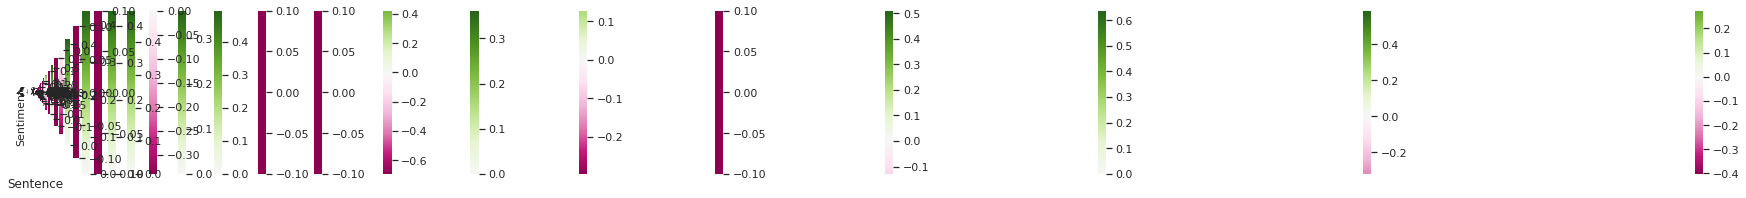

In [86]:
mc3 = Mc_base
negative = 0
positive = 0
neutral = 0

for tweet in mc3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

Influence_MC = ((125 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_MC)

## 3) TEXT BLOB

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.175, subjectivity=0.525)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.625, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4375, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentim

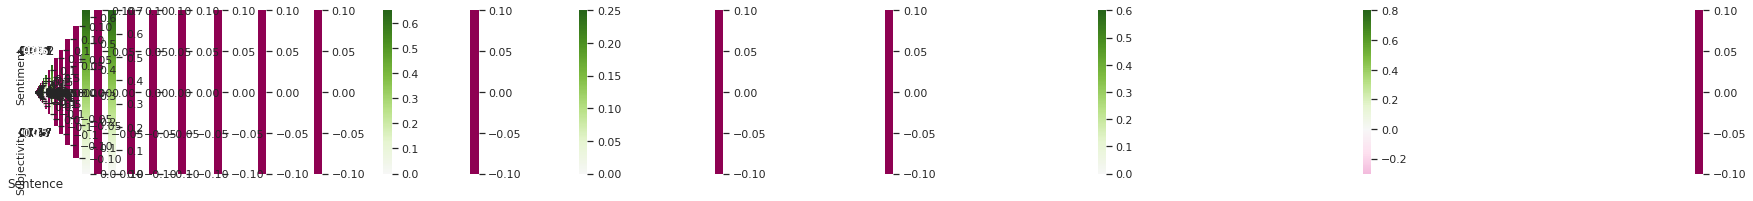

In [87]:
mc4 = Mc_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in mc4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

Influence_MC = ((125 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_MC)




## 4) XGBOOST - ALOGRITHMA

In [93]:
mc5 = Mc_base
neg = 0
pos = 0

for tweet in mc5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1


Influence_MC = ((125 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_MC)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

# JOHN LEGEND 

In [153]:
JL1 = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JohnLegend1.csv')
JL1


,Text,Date,Tweet,Replies,Likes,Retweets
0,JJ,"Jul 26, 2020",Bro why,3.0,16.0,1.0
1,Deborah,"Jul 26, 2020",NaN,NaN,4.0,1.0
2,Nikhil S Joseph,"Jul 26, 2020",You're gonna get a lot of haters :(,1.0,10.0,1.0
3,Dong Rickles,"Jul 26, 2020",we need more \n@Instatituss\n in our day to day,NaN,5.0,2.0
4,Yep It's Me,"Jul 26, 2020",#Trump2020Landslide #Haley2024,1.0,6.0,NaN
5,Kami High,"Jul 26, 2020",Thank you! I wish more people with influence w...,4.0,7.0,NaN
6,Sea Johnston,"Jul 26, 2020",Thank you john.,NaN,3.0,NaN
7,CollegeBound314,"Jul 26, 2020",Can you explain the Obama thing yo wife said t...,7.0,32.0,NaN
8,Name cannot be blank,"Jul 26, 2020",NaN,NaN,NaN,NaN
9,Redd Handed Music,"Jul 26, 2020",You would,NaN,NaN,NaN


In [154]:
JL2 = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JohnLegend2.csv')
JL2

,Text,Date,Tweet,Replies,Likes,Retweets
0,Jeff Hendrick,"Oct 24, 2020",Thank you \n@johnlegend\n ! #America...vote li...,1.0,3.0,NaN
1,DB,"Oct 24, 2020",Thank you!,NaN,2.0,NaN
2,DaBar10der,"Oct 24, 2020","You truly are a wonderful human being, thanks ...",NaN,6.0,NaN
3,Stephanie Noel Kirlin³³º¹,"Oct 24, 2020",I am so frickin’ excited for this lineup of pe...,1.0,9.0,NaN
4,Mrs. Felton,"Oct 24, 2020",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
81,Ginny Verona,"Oct 25, 2020",Already voted RED down BALLOT!!!! \n\nHave no ...,NaN,1.0,NaN
82,Phyllis,"Oct 25, 2020",Ha! Good luck with that!,NaN,NaN,NaN
83,NOT SO Silent Majority,"Oct 25, 2020",#Trump2020Landslide,NaN,NaN,NaN
84,Icantbefrench,"Oct 25, 2020",NaN,NaN,NaN,NaN


In [155]:

nan_value = float("NaN")
# Convert NaN values to empty string
jl11.replace("", nan_value, inplace=True)

jl11.dropna(subset = ["Tweet"], inplace=True)

Jl1_base = jl11
Jl1_base


index = Jl1_base.index
number_of_rows = len(index)
print(number_of_rows)

27


In [156]:
jl21 = JL2.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jl21.replace("", nan_value, inplace=True)


jl21.dropna(subset = ["Tweet"], inplace=True)\

Jl2_base = jl21
Jl2_base

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Text,Date,Tweet,Replies,Likes,Retweets
0,Jeff Hendrick,"Oct 24, 2020",Thank you \n@johnlegend\n ! #America...vote li...,1.0,3.0,NaN
1,DB,"Oct 24, 2020",Thank you!,NaN,2.0,NaN
2,DaBar10der,"Oct 24, 2020","You truly are a wonderful human being, thanks ...",NaN,6.0,NaN
3,Stephanie Noel Kirlin³³º¹,"Oct 24, 2020",I am so frickin’ excited for this lineup of pe...,1.0,9.0,NaN
6,Sean O'Hearn Gay,"Oct 24, 2020",YAAAAASSSSSS,1.0,3.0,NaN
...,...,...,...,...,...,...
80,Al Patriot,"Oct 25, 2020",A vote for Biden is a vote for a Pedophile and...,NaN,NaN,NaN
81,Ginny Verona,"Oct 25, 2020",Already voted RED down BALLOT!!!! \n\nHave no ...,NaN,1.0,NaN
82,Phyllis,"Oct 25, 2020",Ha! Good luck with that!,NaN,NaN,NaN
83,NOT SO Silent Majority,"Oct 25, 2020",#Trump2020Landslide,NaN,NaN,NaN


## 1) FLAIR

In [157]:
sentiment =[]
confidence = []

for tweet in jl11['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jl11['Sent'] = sentiment
jl11['Score'] = confidence
jl11


,Text,Date,Tweet,Replies,Likes,Retweets,Sent,Score
0,JJ,"Jul 26, 2020",Bro why,3.0,16,1.0,POSITIVE,0.518833
2,Nikhil S Joseph,"Jul 26, 2020",You're gonna get a lot of haters :(,1.0,10,1.0,NEGATIVE,0.933596
3,Dong Rickles,"Jul 26, 2020",we need more \n@Instatituss\n in our day to day,NaN,5,2.0,POSITIVE,0.893769
4,Yep It's Me,"Jul 26, 2020",#Trump2020Landslide #Haley2024,1.0,6,NaN,POSITIVE,0.856556
5,Kami High,"Jul 26, 2020",Thank you! I wish more people with influence w...,4.0,7,NaN,POSITIVE,0.981077
6,Sea Johnston,"Jul 26, 2020",Thank you john.,NaN,3,NaN,POSITIVE,0.864997
7,CollegeBound314,"Jul 26, 2020",Can you explain the Obama thing yo wife said t...,7.0,32,NaN,NEGATIVE,0.589097
9,Redd Handed Music,"Jul 26, 2020",You would,NaN,0,NaN,POSITIVE,0.873021
10,John S,"Jul 27, 2020",#Biden2020 #DumpTrump,NaN,1,NaN,POSITIVE,0.856556
11,DawnandherloverCindy,"Jul 27, 2020",I love you \n@johnlegend\n almost as much as I...,2.0,3,NaN,POSITIVE,0.991236


In [158]:
sentiment =[]
confidence = []

for tweet in jl21['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jl21['Sent'] = sentiment
jl21['Score'] = confidence
jl21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Text,Date,Tweet,Replies,Likes,Retweets,Sent,Score
0,Jeff Hendrick,"Oct 24, 2020",Thank you \n@johnlegend\n ! #America...vote li...,1.0,3.0,NaN,POSITIVE,0.746248
1,DB,"Oct 24, 2020",Thank you!,NaN,2.0,NaN,POSITIVE,0.970455
2,DaBar10der,"Oct 24, 2020","You truly are a wonderful human being, thanks ...",NaN,6.0,NaN,POSITIVE,0.993917
3,Stephanie Noel Kirlin³³º¹,"Oct 24, 2020",I am so frickin’ excited for this lineup of pe...,1.0,9.0,NaN,POSITIVE,0.962213
6,Sean O'Hearn Gay,"Oct 24, 2020",YAAAAASSSSSS,1.0,3.0,NaN,POSITIVE,0.659929
...,...,...,...,...,...,...,...,...
80,Al Patriot,"Oct 25, 2020",A vote for Biden is a vote for a Pedophile and...,NaN,NaN,NaN,NEGATIVE,0.913746
81,Ginny Verona,"Oct 25, 2020",Already voted RED down BALLOT!!!! \n\nHave no ...,NaN,1.0,NaN,NEGATIVE,0.975607
82,Phyllis,"Oct 25, 2020",Ha! Good luck with that!,NaN,NaN,NaN,POSITIVE,0.800517
83,NOT SO Silent Majority,"Oct 25, 2020",#Trump2020Landslide,NaN,NaN,NaN,POSITIVE,0.817045


In [159]:
Positive = 0
Negative = 0

for c in jl11['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1


for c in jl21['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1


Retweet =  569 + 1000

total_likes = 4800 + 5500

print(Positive , Negative)


Influence_JL = ((94 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_JL)

64 32
148.77


## 2) NLTK

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.55, 'neu': 0.45, 'pos': 0.0, 'compound': -0.7269}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8122}
{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
{'neg': 0.059, 'neu': 0.844, 'pos': 0.097, 'compound': 0.2263}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.8555}
{'neg': 0.141, 'neu': 0.633, 'pos': 0.226, 'compound': 0.5658}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'compound': -0.3382}
{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.

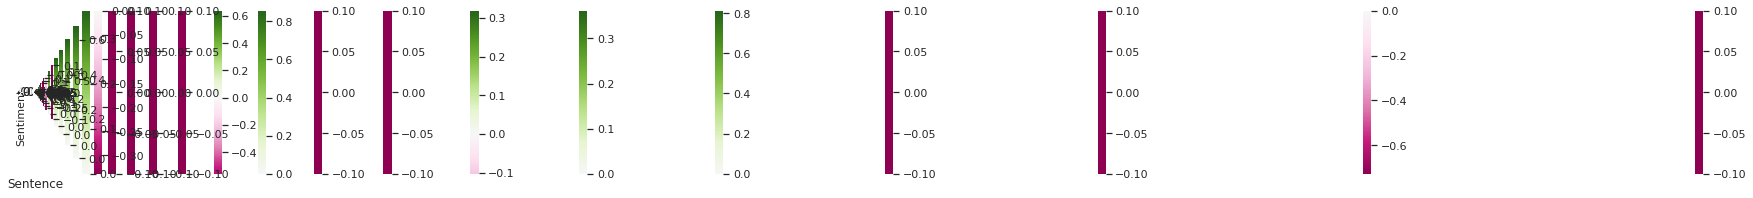

In [160]:
jl13 = Jl1_base
jl23 = Jl2_base

negative = 0
positive = 0
neutral = 0


for tweet in jl13['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

for tweet in jl23['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1


Influence_JL1 = ((94 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_JL1)

## 3) TEXTBLOB


Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.33999999999999997, subjectivity=0.54)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.10000000000000002, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=0.75, subjectivity=0.75)
Sentiment(polarity=0.2625, subjectivity=0.23)
Sentiment(polarity=0.125, subjectivity=1.0)
Sentiment(polarity=0.494047619

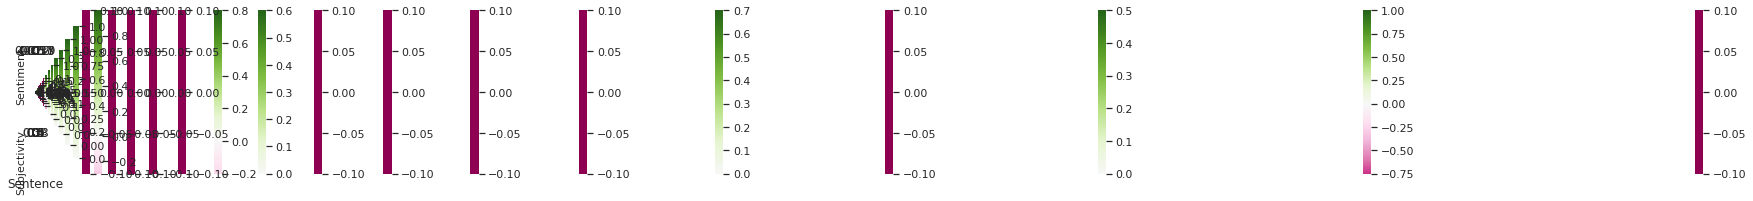

In [161]:
jl24 = Jl2_base
jl14 = Jl1_base

negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in jl14['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

for tweet in jl24['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1



Influence_JL = ((94 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_JL) 

## 4) XGBOOST ALGORITHMA 

In [162]:
jl15 = Jl1_base
jl25 = Jl2_base

neg = 0
pos = 0




for tweet in jl15['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

for tweet in jl25['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1


Influence_JL = (( 94 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_JL)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

#Jennifer Hudson

In [163]:
JH = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JenniferHudson.csv')
JH

,Name,Date,Tweet,Likes,Retweets,Replies
0,ScorpionGoddess,Jan 20,NaN,NaN,NaN,NaN
1,Joseph Rainone Jr.,Jan 20,"Amen Jennifer, may God bless them.",1.0,NaN,NaN
2,jeniffer tilly | barbia era,Jan 20,in a perfect world you would’ve replaced jlow ...,3.0,NaN,NaN
3,Aaron Howlett,Jan 20,A turning point for America .,1.0,NaN,NaN
4,kathy thurman,Jan 20,Yes!,NaN,NaN,NaN
5,Camelsinkagools(CIK),Jan 21,Wow impressive.. decency,NaN,NaN,NaN
6,Farris Flagg,Jan 21,They should've asked you to perform at the #In...,NaN,NaN,NaN
7,Rolo,Jan 21,After 4 years of delusion and confusion we kno...,NaN,NaN,NaN
8,Darren Lewis,Jan 31,Really.... Reset being the key word! Evil...,NaN,NaN,NaN
9,Punky74,Feb 9,I just read the most beautiful story of what P...,1.0,NaN,NaN


In [164]:
jh1 = JH.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jh1.replace("", nan_value, inplace=True)

jh1.dropna(subset = ["Tweet"], inplace=True)
Jh_base = jh1
Jh_base

index = Jh_base.index
number_of_rows = len(index)
print(number_of_rows)

27


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [165]:
sentiment =[]
confidence = []

for tweet in jh1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)



jh1['Sent'] = sentiment
jh1['Score'] = confidence
jh1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Date,Tweet,Likes,Retweets,Replies,Sent,Score
1,Joseph Rainone Jr.,Jan 20,"Amen Jennifer, may God bless them.",1.0,NaN,NaN,POSITIVE,0.963991
2,jeniffer tilly | barbia era,Jan 20,in a perfect world you would’ve replaced jlow ...,3.0,NaN,NaN,POSITIVE,0.903754
3,Aaron Howlett,Jan 20,A turning point for America .,1.0,NaN,NaN,NEGATIVE,0.705314
4,kathy thurman,Jan 20,Yes!,NaN,NaN,NaN,POSITIVE,0.964498
5,Camelsinkagools(CIK),Jan 21,Wow impressive.. decency,NaN,NaN,NaN,POSITIVE,0.959106
6,Farris Flagg,Jan 21,They should've asked you to perform at the #In...,NaN,NaN,NaN,NEGATIVE,0.996401
7,Rolo,Jan 21,After 4 years of delusion and confusion we kno...,NaN,NaN,NaN,POSITIVE,0.929273
8,Darren Lewis,Jan 31,Really.... Reset being the key word! Evil...,NaN,NaN,NaN,POSITIVE,0.504636
9,Punky74,Feb 9,I just read the most beautiful story of what P...,1.0,NaN,NaN,POSITIVE,0.564063
10,Polson24,Jan 21,"May God bless, direct, protect, and guide Pres...",NaN,NaN,NaN,POSITIVE,0.996264


##1) flair


In [166]:
Positive = 0
Negative = 0

for c in jh1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 169

total_likes = 2400

print(Positive , Negative)


Influence_JH = (( 27 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_JH)

21 6
29.74


##2) NKTL

{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.5994}
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4574}
{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.058, 'neu': 0.727, 'pos': 0.215, 'compound': 0.6486}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.9403}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.7783}
{'neg': 0.149, 'neu': 0.732, 'pos': 0.119, 'compound': 0.4501}
{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.7574}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
{'neg': 0.046, 'neu': 0.744, 'pos': 0.21, 'compound': 0.8718}
{'neg': 0.079, 'neu': 0.495, 'pos': 0.425, 'compound': 0.976}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 

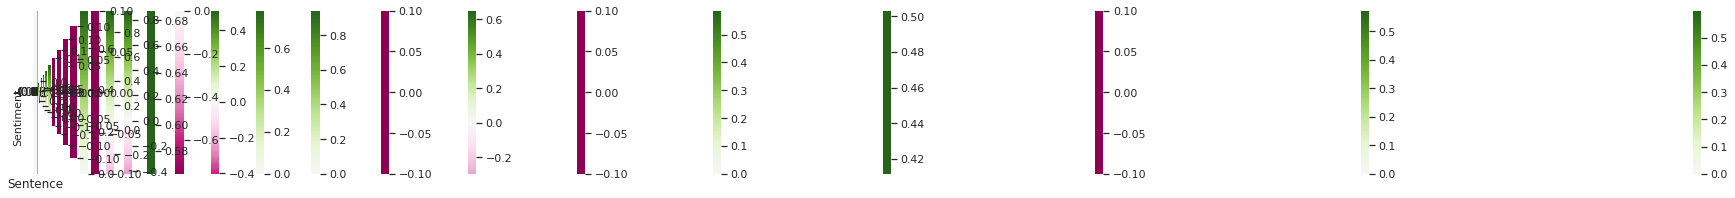

In [167]:
jh3 = Jh_base
negative = 0
positive = 0
neutral = 0

for tweet in jh3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1


Influence_TS = ((27 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_TS)

##3) Textblob

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.55, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=-0.26666666666666666, subjectivity=0.7333333333333334)
Sentiment(polarity=0.5193181818181818, subjectivity=0.6613636363636364)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.09583333333333333, subjectivity=0.5041666666666667)
Sentiment(polarity=-0.75, subjectivity=0.95)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.31174603174603177, subjectivity=0.5977777777777777)
Sentiment(polarity=0.82, subjectivity=0.6399999999999999)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


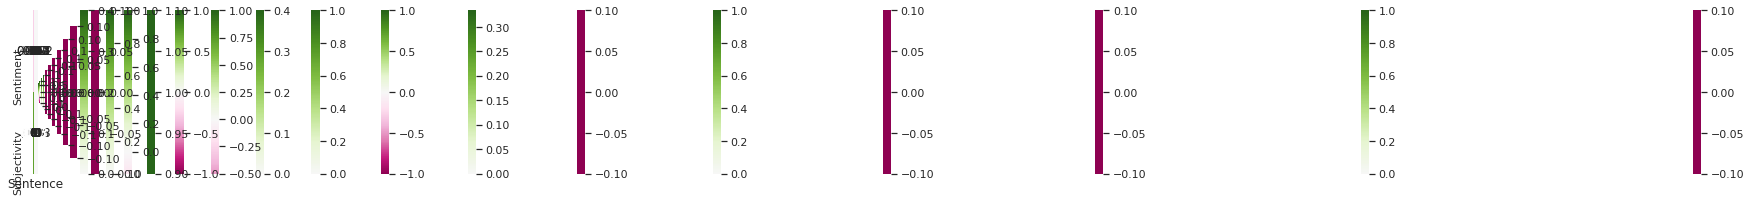

In [168]:
jh4 = Jh_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in jh4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1



Influence_JH = ((27 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_JH)

##4) xg_boost algorithma 

In [169]:
jh5 = Jh_base
neg = 0
pos = 0



for tweet in jh5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

Influence_JH = ((27 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_JH)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
32.98


#Conor Mcgregor

In [170]:
CM = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/ConorMcgregor.csv')
CM

,Name,Date,Tweet,Replies,Retweets,Likes
0,Blake Wurm,"Jan 21, 2020",NaN,15.0,83.0,1.4K
1,Frank Mir Fan,"Jan 21, 2020",34,NaN,NaN,NaN
2,Colby Covington Fan Club,"Jan 21, 2020",NaN,212.0,190.0,4.5K
3,Luis,"Jan 21, 2020",3,NaN,NaN,NaN
4,Mohammed,"Jan 21, 2020",GIF,8.0,13.0,457
...,...,...,...,...,...,...
192,ExDemLatina,"Jan 23, 2020",NaN,NaN,4.0,8
193,mark schade aka Spanky Dennison,"Jan 23, 2020",NaN,NaN,NaN,NaN
194,Adriel Aleman,"Jan 23, 2020",NaN,NaN,NaN,NaN
195,Zombie McZombieface,"Jan 23, 2020",NaN,NaN,NaN,NaN


In [171]:
cm1 = CM.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
cm1.replace("", nan_value, inplace=True)
cm1.dropna(subset = ["Tweet"], inplace=True)

Cm_base = cm1
Cm_base

index = Cm_base.index
number_of_rows = len(index)
print(number_of_rows)

45


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [172]:

sentiment =[]
confidence = []

for tweet in cm1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


cm1['Sent'] = sentiment
cm1['Score'] = confidence
cm1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Date,Tweet,Replies,Retweets,Likes,Sent,Score
1,Frank Mir Fan,"Jan 21, 2020",34,NaN,NaN,NaN,POSITIVE,0.600670
3,Luis,"Jan 21, 2020",3,NaN,NaN,NaN,POSITIVE,0.649083
4,Mohammed,"Jan 21, 2020",GIF,8.0,13.0,457,POSITIVE,0.669689
6,せいじ Seiji,"Jan 21, 2020",GIF,8.0,11.0,425,POSITIVE,0.669689
7,Notorious,"Jan 21, 2020",GIF,NaN,NaN,NaN,POSITIVE,0.669689
8,Roe Jogan,"Jan 21, 2020",15,NaN,NaN,NaN,POSITIVE,0.720058
10,Champ Champ,"Jan 21, 2020",1,NaN,NaN,NaN,POSITIVE,0.629857
11,CRE,"Jan 21, 2020",GIF,4.0,8.0,79,POSITIVE,0.669689
12,Jez,"Jan 21, 2020",GIF,33.0,28.0,466,POSITIVE,0.669689
17,NaN,"Jan 21, 2020",97,NaN,NaN,NaN,POSITIVE,0.776684


##1) flair

In [173]:
Positive = 0
Negative = 0

for c in cm1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 25700

total_likes = 101200

print(Positive , Negative)

Influence_CM = (( 45 * (Positive-Negative)) + (total_likes+Retweet)) / 100

print(Influence_CM)

42 3
1286.55


##2) NLTK

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'po

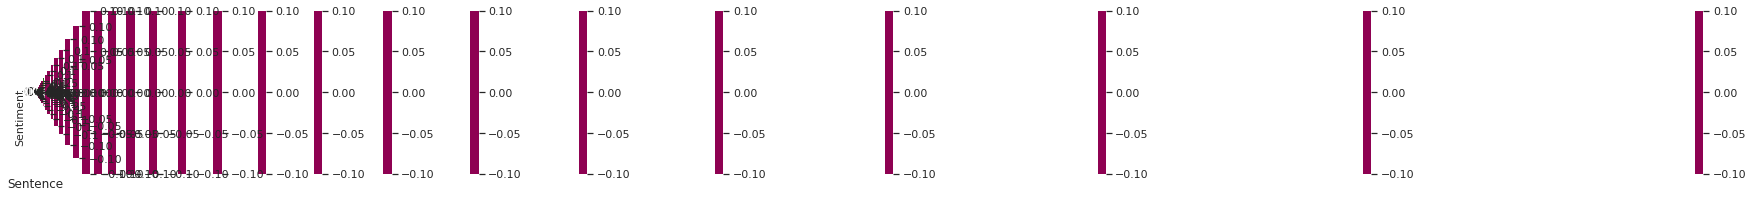

In [174]:
 cm3 = Cm_base
negative = 0
positive = 0
neutral = 0

for tweet in cm3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

Influence_CM = (( 45 * (positive-negative)) + (total_likes+Retweet)) / 100

print(Influence_CM)

##3) textblob

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivi

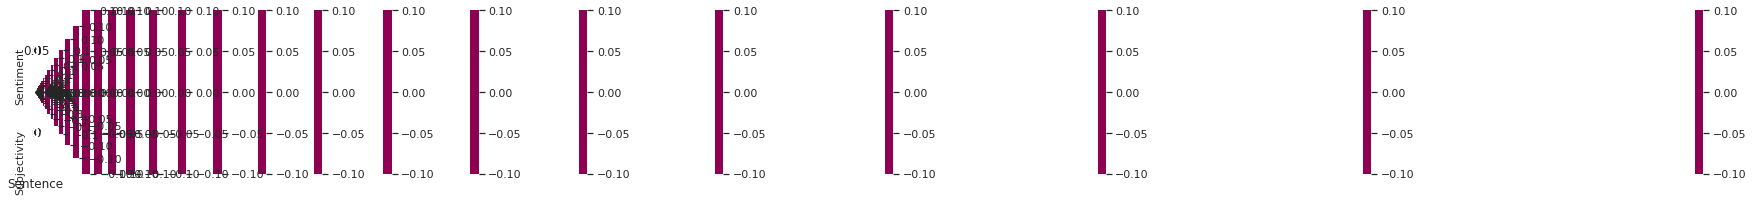

In [129]:
cm4 = Cm_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in cm4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

Influence_CM = (( 45 * (positive1-negative1)) + (total_likes+Retweet)) / 100

print(Influence_CM)

##4) xg_boost Algorithma 


In [130]:
cm5 = Cm_base
neg = 0
pos = 0

for tweet in cm5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1


Influence_CM = (( 45 * (pos-neg)) + (total_likes+Retweet)) / 100

print(Influence_CM)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
1289.25
